In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 41.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 69.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 21.1 MB/s eta 0:00:00


In [2]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s eta 0:00:00


In [3]:
!pip uninstall -y matplotlib
!pip install matplotlib==3.7.3

Found existing installation: matplotlib 3.8.2
Uninstalling matplotlib-3.8.2:
  Successfully uninstalled matplotlib-3.8.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.9 MB/s eta 0:00:0000:010:01


In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
import tensorflow as tf
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import DistilBertConfig
from tensorflow.keras.utils import plot_model

model = tf.keras.models.load_model('/mnt/tensorflow')

# Check its architecture
model.summary()

2024-01-16 23:53:39.522804: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-16 23:53:44.406960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-16 23:53:44.407007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: 756fd8c51e4b
2024-01-16 23:53:44.407015: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 64)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 64)]         0           []                               
                                                                                                  
 distilbert (TFDistilBertMainLa  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 yer)                           ast_hidden_state=(N               'input_mask[0][0]']             
                                one, 64, 768),                                                    
                                 hidden_states=None                                           

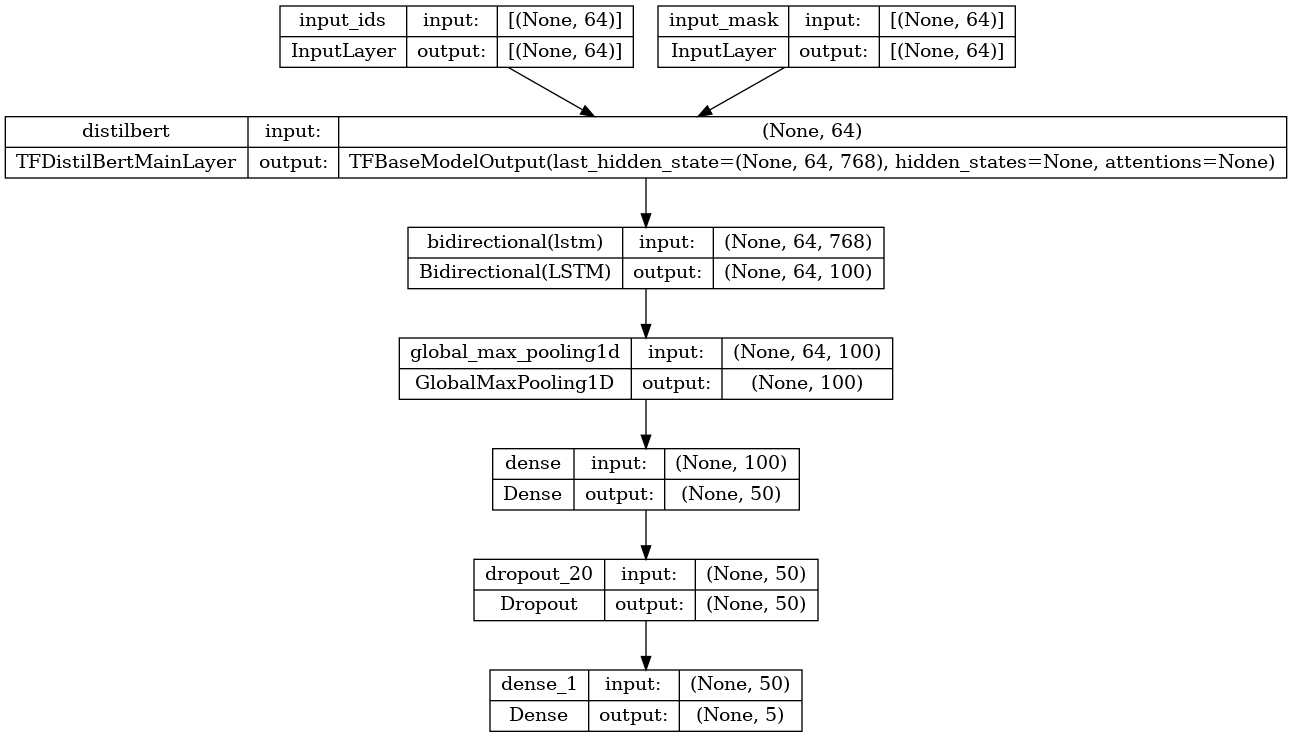

In [6]:
plot_model(model,show_shapes=True)

In [7]:
config = DistilBertConfig.from_pretrained(
    "distilbert-base-uncased",
)

config.json: 100%|█████████████████████████████████████████████████████████████████████| 483/483 [00:00<00:00, 1.86MB/s]


In [8]:
transformer_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config)

model.safetensors: 100%|█████████████████████████████████████████████████████████████| 268M/268M [00:05<00:00, 48.0MB/s]
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and ar

In [9]:
transformer_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_38 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


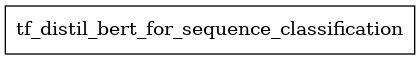

In [10]:
plot_model(transformer_model,show_shapes=True)

In [11]:
max_seq_length = 64

CLASSES = [1, 2, 3, 4, 5]

config = DistilBertConfig.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(CLASSES),
    id2label={0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
    label2id={1: 0, 2: 1, 3: 2, 4: 3, 5: 4},
)
print(config)

DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": 1,
    "1": 2,
    "2": 3,
    "3": 4,
    "4": 5
  },
  "initializer_range": 0.02,
  "label2id": {
    "1": 0,
    "2": 1,
    "3": 2,
    "4": 3,
    "5": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.36.2",
  "vocab_size": 30522
}



In [12]:
import pandas as pd
import numpy as np

from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def predict(text):
    encode_plus_tokens = tokenizer.encode_plus(
                            text,
                            pad_to_max_length=True,
                            max_length=max_seq_length,
                            truncation=True,
                            return_tensors='tf')
    
    input_ids = encode_plus_tokens['input_ids']
    input_mask = encode_plus_tokens['attention_mask']
    
    outputs = model.predict(x=(input_ids,input_mask))
    
    prediction = [{"label":config.id2label[item.argmax()], \
                   "socre":item.max().item()} for item in outputs]

    return prediction[0]

tokenizer_config.json: 100%|█████████████████████████████████████████████████████████| 28.0/28.0 [00:00<00:00, 59.7kB/s]
vocab.txt: 100%|██████████████████████████████████████████████████████████████████████| 232k/232k [00:00<00:00, 524kB/s]
tokenizer.json: 100%|█████████████████████████████████████████████████████████████████| 466k/466k [00:00<00:00, 767kB/s]


In [13]:
predict("This is great!")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 2s 2s/step


{'label': 5, 'socre': 0.8344945311546326}

In [14]:
df = pd.read_parquet("/mnt/amazon_reviews_2015_tail.snappy.parquet",columns=["star_rating","review_id","review_body"])

In [15]:
numOfSample=200
for i in range(1,6):
    new_df = 'df' + str(i)
    globals()[new_df] = df[df['star_rating'] == i].sample(n=numOfSample)

In [16]:
test_df = pd.concat([df1,df2,df3,df4,df5])

In [17]:
test_df.count()

star_rating    1000
review_id      1000
review_body    1000
dtype: int64

In [18]:
test_df['review_id'] = test_df['review_id'].str.decode("utf-8")

In [19]:
test_df['review_body'] = test_df['review_body'].str.decode("utf-8","ignore")

In [20]:
test_df

,star_rating,review_id,review_body
5698282,1,RTVZ6TZN2K2MV,"This product is not what i expected at all, I ..."
22113519,1,R174YW1UBURS7J,Plain and simple it does not work. I did not n...
28246572,1,R1BMYMYRSWXD9F,Was broken when it came in the mail
13998760,1,R2Y3EE4UU04JGL,Very limited information.
6302075,1,R1J3LDYW2UC5HZ,THIS GAME DID NOT OPEN!!!
...,...,...,...
33210508,5,R39KY2J3CBVLJJ,"Wonderfully detailed, very much like the real ..."
18248890,5,R26DE1Z3D88C6I,Iove to play minecraft it is so cool and I pla...
1447413,5,RMXK81BHQTCJD,Great twists and turns in this mystery! Very g...
21156375,5,R27NS8U705JDRQ,"I love them, really what I expect it! And real..."


In [21]:
y_test = test_df['review_body'].map(predict)
y_true = test_df['star_rating']

1/1 [==============================] - 0s 75ms/step


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 73ms/step


In [22]:
print(type(y_true))
y_true2 = [x for x in y_true.values]

<class 'pandas.core.series.Series'>


In [23]:
print(type(y_true2))
print(y_true2)

<class 'list'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [24]:
print(type(y_test))
y_test2 = [x.get('label') for x in y_test.values]

<class 'pandas.core.series.Series'>


In [25]:
print(type(y_test2))
print(y_test2)

<class 'list'>
[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 1, 2, 1, 2, 4, 1, 3, 2, 1, 3, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1, 1, 2, 3, 2, 3, 2, 1, 3, 3, 4, 2, 1, 2, 2, 2, 1, 4, 3, 2, 2, 2, 3, 1, 4, 1, 2, 4, 3, 1, 2, 3, 1, 3, 2, 1, 2, 2, 3, 2, 4, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 4, 1, 2, 3, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 4, 1, 2, 1, 1, 2, 1, 2, 

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#print(CLASSES)
cm = confusion_matrix(y_true2, y_test2, labels=CLASSES)
cm_df = pd.DataFrame(cm, index=CLASSES, columns=CLASSES)
cm_df

,1,2,3,4,5
1,151,36,10,3,0
2,61,91,37,10,1
3,16,58,82,27,17
4,8,6,37,90,59
5,8,2,12,45,133


In [27]:
arrayX = []
for array in cm:
    temp = []
    # print(array)
    # sumOfValue = array.sum()
    for i in range(len(array)):
        # print(array[i])
        # temp.append(array[i]/sumOfValue)
        temp.append(array[i]/numOfSample)
    arrayX.append(temp)

# print(arrayX)
arrayX_df = pd.DataFrame(arrayX, index=CLASSES, columns=CLASSES)
arrayX_df

,1,2,3,4,5
1,0.755,0.180,0.050,0.015,0.000
2,0.305,0.455,0.185,0.050,0.005
3,0.080,0.290,0.410,0.135,0.085
4,0.040,0.030,0.185,0.450,0.295
5,0.040,0.010,0.060,0.225,0.665


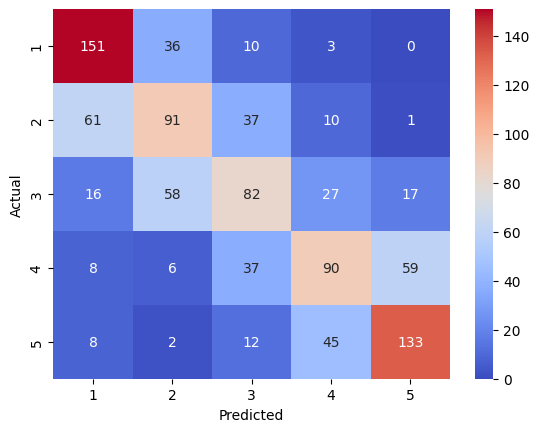

In [28]:
sns.heatmap(cm_df, annot=True, annot_kws={"fontsize":10}, cmap='coolwarm', fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

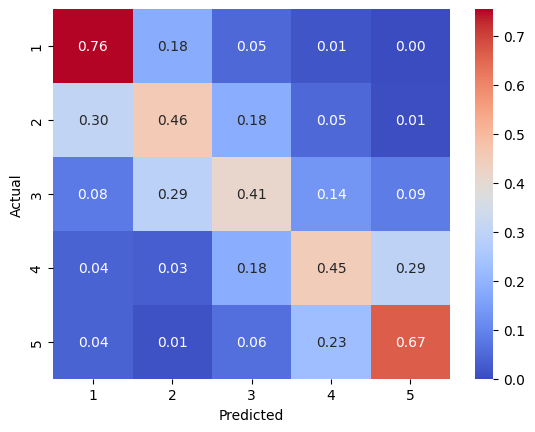

In [29]:
sns.heatmap(arrayX_df, annot=True, annot_kws={"fontsize":10}, cmap='coolwarm', fmt='.2f', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>